<a href="https://colab.research.google.com/github/PolinaZasheva/Whats-For-Breakfast/blob/master/food_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen

In [0]:
base_dir = '/content/gdrive/My Drive/food_data/'
model_file = base_dir+'best_model_3class.hdf5'

In [0]:

food_list =['Not_Breakfast','breakfast_burrito','deviled_eggs','donuts','french_toast','huevos_rancheros','omelette','pancakes','waffles']
# ['french_toast','omelette','waffles','breakfast_burrito','deviled_eggs','donuts','pancakes','huevos_rancheros']

In [0]:
# Load model to make predictions
K.clear_session()
model_best = load_model(model_file,compile = False)

In [0]:
# Download images from internet using the URLs
!wget -O pic1.jpg https://www.graceandgoodeats.com/wp-content/uploads/2018/09/homemade-waffles.jpg
!wget -O pic2.jpg https://www.momables.com/wp-content/uploads/2013/12/Egg-free-french-toast_post.jpg
!wget -O pic3.jpg https://gracefoods.com/images/Recipes2017/Puffy-Tuna-Omelette.jpg
!wget -O pic4.jpg https://s3.amazonaws.com/pixtruder/original_images/9fbb73a7cba9b7b75c3d05484f6b6d087470641d
!wget -O pic5.jpg https://ux2cms.imgix.net/images/20151023095415_10r.jpg
!wget -O pic6.jpg https://fitfoodiefinds.com/wp-content/uploads/2015/10/classic-oatmeal.png


--2019-07-23 14:38:15--  https://www.graceandgoodeats.com/wp-content/uploads/2018/09/homemade-waffles.jpg
Resolving www.graceandgoodeats.com (www.graceandgoodeats.com)... 198.99.157.194
Connecting to www.graceandgoodeats.com (www.graceandgoodeats.com)|198.99.157.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60761 (59K) [image/jpeg]
Saving to: ‘pic1.jpg’

pic1.jpg            100%[===================>]  59.34K  --.-KB/s    in 0.1s    

2019-07-23 14:38:15 (468 KB/s) - ‘pic1.jpg’ saved [60761/60761]

--2019-07-23 14:38:16--  https://www.momables.com/wp-content/uploads/2013/12/Egg-free-french-toast_post.jpg
Resolving www.momables.com (www.momables.com)... 97.107.128.110
Connecting to www.momables.com (www.momables.com)|97.107.128.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170515 (167K) [image/jpeg]
Saving to: ‘pic2.jpg’

pic2.jpg            100%[===================>] 166.52K  --.-KB/s    in 0.04s   

2019-07-23 14:38:16 (4.

In [0]:
# Function for making predictions using the given model
def predict_class(model, images, show = True):
  for img in images:
    image_name = img
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    print(index)
    food_list.sort()
    pred_value = food_list[index]
    print(pred_value)
    print(image_name + " " + pred_value + " " + str(pred[0,index]))
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.show()

In [0]:
# Make a list of downloaded images and test the trained model
images = []
images.append('pic1.jpg')
images.append('pic2.jpg')
images.append('pic3.jpg')
images.append('pic4.jpg')
images.append('pic5.jpg')
images.append('pic6.jpg')


In [0]:
images

['pic1.jpg', 'pic2.jpg', 'pic3.jpg', 'pic4.jpg', 'pic5.jpg', 'pic6.jpg']

8
waffles
pic1.jpg waffles 0.98468566


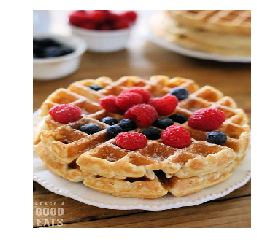

4
french_toast
pic2.jpg french_toast 0.7443691


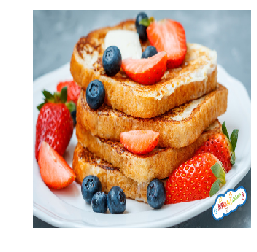

6
omelette
pic3.jpg omelette 0.9718445


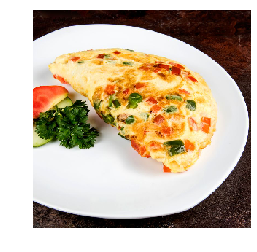

0
Not_Breakfast
pic4.jpg Not_Breakfast 0.71219975


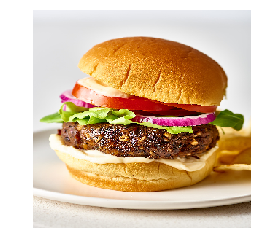

0
Not_Breakfast
pic5.jpg Not_Breakfast 0.7658836


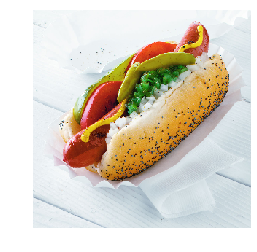

8
waffles
pic6.jpg waffles 0.52603555


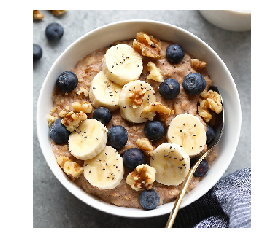

In [0]:
predict_class(model_best, images, True)